In [6]:
# Plot ad hoc mnist instances
#from keras.datasets import mnist
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('train.csv').values
X = data[:,1:]
Y = data[:,0]

labels = ["Not normalized 80% training data", "Normalized 80% training data"]
plot_args = [{'c': 'red', 'linestyle': '-'},{'c': 'green', 'linestyle': '-'}]

In [7]:
def getTrainingData(X, Y, train_ratio, normalize=True):
    
    TRAINING_SIZE = (int)(len(data)*train_ratio)
    
    if(normalize==True): X = X/X.max()
    
    X_train = X[0:TRAINING_SIZE,:]
    Y_train = Y[0:TRAINING_SIZE]
   
    return X_train, Y_train

def getTestingData(X, Y, train_ratio, test_size, test_remaining=False, normalize=True):
    
    TRAINING_SIZE = (int)(len(data)*train_ratio)
    
    if(normalize==True): X = X/X.max()
    
    if test_remaining==True:
        X_test = X[TRAINING_SIZE:,:]
        Y_test = Y[TRAINING_SIZE:]
    else:
        X_test = X[TRAINING_SIZE:TRAINING_SIZE+test_size,:]
        Y_test = Y[TRAINING_SIZE:TRAINING_SIZE+test_size]
    
    return X_test, Y_test

In [10]:
TRAINING_RATIO = 0.8

data_sets = [getTrainingData(X,Y,TRAINING_RATIO, False),getTrainingData(X,Y,TRAINING_RATIO, True)]

clfs = []
for label, data_set in zip(labels, data_sets):
    X_train, Y_train = data_set
    print("training: %s" % label)
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train,Y_train)
    clfs.append(clf) 
    print("done training: %s!" % label)
print("done all training!")

training: Not normalized 80% training data
done training: Not normalized 80% training data!
training: Normalized 80% training data
done training: Normalized 80% training data!
done all training!


Compute predictions
Accuracy:  0.969047619047619
score of testing data  0.969047619047619
[0 7 7 2 2 6 5 7 8 5]
[0 7 7 2 2 6 5 7 5 5]
Training set score: 0.969048


AttributeError: 'KNeighborsClassifier' object has no attribute 'loss_'

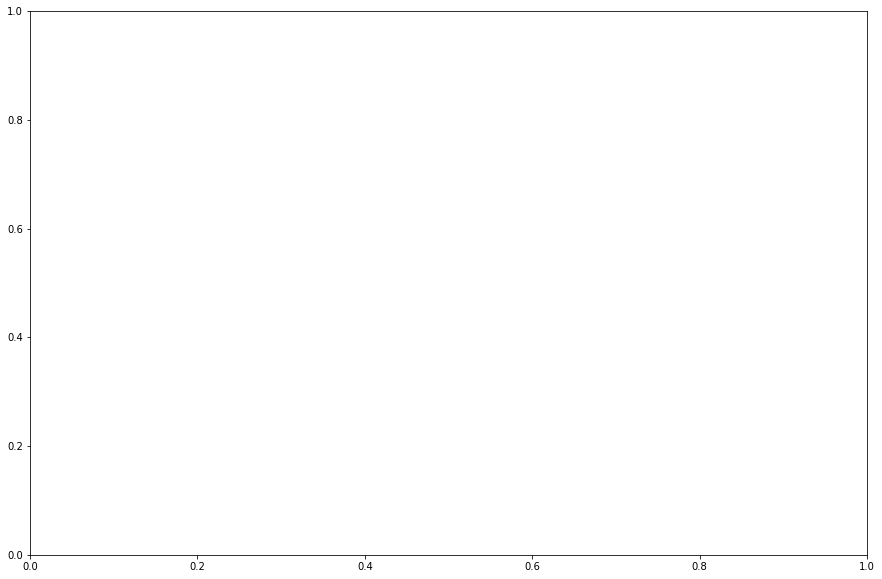

In [11]:
testing_sets = [getTestingData(X, Y, TRAINING_RATIO, 100, test_remaining=True, normalize=False),
                getTestingData(X, Y, TRAINING_RATIO, 100, test_remaining=True, normalize=True)]


fig, axes = plt.subplots(figsize=(15, 10))
for clf, testing_set, label, plot_arg in zip(clfs, testing_sets, labels, plot_args):
    
    X_test, Y_test = testing_set
    
    print("Compute predictions")
    predicted = clf.predict(X_test)

    print("Accuracy: ", accuracy_score(Y_test, predicted))

    #print("score of training data ", clf.score(X, y))
    print("score of testing data ", clf.score(X_test, Y_test))

    print(Y_test[0:10])
    print(clf.predict(X_test[0:10]))
    print("Training set score: %f" % clf.score(X_test, Y_test))
    print("Training set loss: %f" % clf.loss_)
    print(clf.loss_curve_)
    axes.plot(clf.loss_curve_, label=label, **plot_arg)

fig.legend(axes.get_lines(), labels, ncol = 2, loc="upper center")
plt.show()